# Support Vector Machine


서포트 벡터 머신(Support Vector Machine, SVM)은 분류(Classification)와 회귀(Regression) 문제를 해결하기 위한 강력한 머신러닝 알고리즘이다. SVM의 주요 목표는 데이터를 분류하거나 회귀선을 통해 예측하는 것이다.


**SVM의 기본 개념**


SVM은 **결정 경계(Decision Boundary)** 또는 **초평면(Hyperplane)** 을 찾아서 데이터를 두 개 이상의 클래스 또는 회귀 값을 기준으로 나누는 알고리즘이다. 이때 SVM의 주요 특징은 **마진(Margin)** 을 최대화하는 것인데, 마진은 초평면과 가장 가까운 데이터 포인트(서포트 벡터) 사이의 거리이다.


**SVM의 핵심 요소**


![](https://wikidocs.net/images/page/256838/06_Support_Vector_Machine.png)


1. **초평면(Hyperplane)**: 데이터를 나누는 기준 선(또는 면)으로, n차원 공간에서의 결정 경계를 의미한다.
2. **마진(Margin)**: 초평면과 가장 가까운 서포트 벡터 사이의 거리이다. SVM은 이 마진을 최대화하려고 한다.
3. **서포트 벡터(Support Vector)**: 초평면에 가장 가까운 데이터 포인트들로, 이 포인트들이 초평면을 결정짓는다.


**SVM의 종류**


- **Linear SVM**: 데이터가 선형으로 분리 가능한 경우 적용한다.
- **Non-linear SVM**: 데이터가 선형으로 분리 불가능할 때, 커널 함수를 사용하여 고차원 공간으로 매핑한 후 선형 초평면을 찾는다.
- **SVM Regression(SVR)**: SVM의 개념을 회귀 문제에 확장한 것으로, 마진 안에서 최대한 많은 데이터 포인트를 포함하며, 초평면과의 거리를 최소화한다.


**SVM의 주요 개념 설명**


1. 결정 경계와 마진
  SVM은 다양한 결정 경계들 중에서 가장 큰 마진을 가지는 초평면을 찾으려고 한다. 이는 모델이 데이터의 새로운 포인트에 대해 좀 더 일반화된 성능을 가지게끔 돕는다.
2. 커널 함수(Kernel Function)
  데이터가 선형적으로 분리되지 않는 경우, 커널 함수를 사용하여 저차원 데이터를 고차원으로 변환하여 선형적으로 분리할 수 있는 초평면을 찾는다. 주요 커널 함수에는 **선형 커널(Linear Kernel)**, **다항 커널(Polynomial Kernel)**, **가우시안 RBF 커널(Gaussian RBF Kernel)** 등이 있다.




**SVM의 수학적 정의**


:white_check_mark: 기본 수식
결정 경계는 다음과 같은 직선 또는 초평면으로 표현된다:


$$
w · x + b = 0
$$


- `x`: 입력 데이터 (벡터)
- `w`: 결정 경계의 방향을 나타내는 벡터
- `b`: 절편


:white_check_mark: 분류 조건


각 데이터(xᵢ)가 올바르게 분류되려면 다음을 만족해야 한다:


$$
yᵢ(w · xᵢ + b) ≥ 1
$$


- `yᵢ`는 정답 레이블 (+1 또는 -1)


:white_check_mark: 마진(Margin)


마진이란 경계선에서 가장 가까운 데이터까지의 거리이다.
SVM은 **이 마진을 최대화**하려고 한다.


마진 크기:


$$
margin = 2 / ||w||
$$


→ 그래서 `||w||`를 **최소화**하면 마진이 최대화됨.






:white_check_mark: 최종 목적 함수 (하드 마진 SVM)
아래는 최적화문제를 표현하는 표준수학표현이다.


$$
(최소화대상) minimize    (1/2) * ||w||²
$$
$$
(모든 데이터 i에 대해) 조건부(제약조건) subject to  yᵢ(w · xᵢ + b) ≥ 1
$$


→ 즉, **마진을 최대화하면서 모든 데이터를 올바르게 분류**하려고 함.


# 선형 커널

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# 데이터 준비
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()


X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [3]:
# 모델 학습/평가
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear', random_state=42) # 직선형태의 초평면
svm_clf.fit(X_train, y_train)


print('학습셋:', svm_clf.score(X_train, y_train))
print('평가셋:', svm_clf.score(X_test, y_test))
# 여기에서는 다 맞췄다. -> svm의 경계가 잘 맞아 떨어졌다.

학습셋: 0.9833333333333333
평가셋: 1.0


## 시각화
DesicionBoundaryDisplay 클래스 2차원 특성까지만 지원
iris는 4개의 특성을 가지고 있으므로, 2개의 차원만 추려내어 진행(PCA차원축소 이용)
- 차원: 데이터의 특성 수를 의미

In [4]:
# PCA 차원 축소
from sklearn.decomposition import PCA

# Principal Component Analysis(주성분 분석)
# 비지도 학습 모델
pca =  PCA(n_components=2) # n개의 차원(특성)을 2개의 차원(특성)으로 축소
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# 시각화하려고 함. 할 때 차원 줄여줄려고
X_train_pca
# -> 원래 4개짜리인데 4개의 정보를 잘 반영한 특성 2개를 만들어줌


array([[-2.90333682, -0.54299974],
       [ 0.49786421, -1.15857037],
       [ 1.3229089 ,  0.22065375],
       [-2.68548399, -0.08921653],
       [ 0.1487804 , -0.67542806],
       [ 1.51224903, -0.38929739],
       [ 0.34045327, -0.49299039],
       [ 1.43083723, -0.1449451 ],
       [ 3.07056835,  0.64972748],
       [ 3.48330265,  1.17227273],
       [ 3.38972426,  0.52238761],
       [ 0.79946157, -0.15675066],
       [-0.52953214, -1.26284314],
       [ 0.22160188, -0.32980694],
       [ 0.21554687, -0.40563033],
       [-2.64604839, -0.16037215],
       [-2.5968097 ,  0.554453  ],
       [ 2.30766616, -0.26379184],
       [ 1.89244784,  0.05829459],
       [-2.4184234 ,  0.42621863],
       [ 1.28404867, -0.34203941],
       [-2.5470213 ,  0.54601194],
       [ 3.22919206,  1.36010168],
       [-2.5194465 , -0.127841  ],
       [-0.20662815, -0.68002564],
       [ 1.95718737, -0.17275641],
       [ 1.78939268, -0.22306417],
       [-2.48028576,  0.16263648],
       [ 1.18047456,

In [5]:
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_pca, y_train)

print('학습셋:', svm_clf.score(X_train_pca, y_train))
print('평가셋:', svm_clf.score(X_test_pca, y_test))
# 당연히 4개 학습한 학습셋이 더 잘나옴 -> 시각화 하기 위해서 하는 것임

학습셋: 0.975
평가셋: 0.9


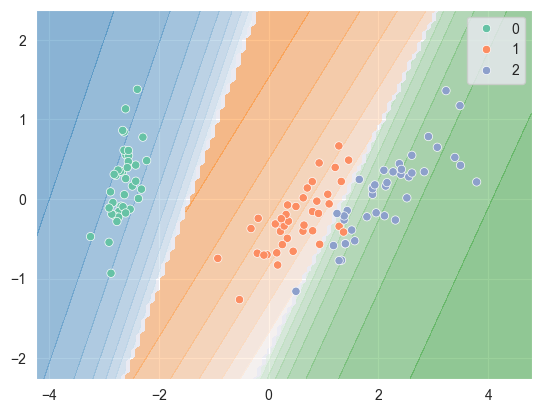

In [6]:
# 초평면 시각화
from sklearn.inspection import DecisionBoundaryDisplay

# from_estimator(모델, 경계를 그릴 범위)
# X_train_pca:  2차원 학습데이터 -> 어디까지 경계를 그릴지 기준이 되는 범위
DecisionBoundaryDisplay.from_estimator(svm_clf, X_train_pca, alpha=0.5)
                                                            # 배경 투명하게
# 학습데이터 시각화
sns.scatterplot(
    x=X_train_pca[:, 0],
    y=X_train_pca[:, 1],
    hue = y_train,
    palette = 'Set2'
)

plt.show()

## 비선형 커널
- rbf 커널
- 다항커널
- 시그모이드커널

### RBF 커널


**RBF 커널(Radial Basis Function)** 은 두 데이터 포인트 간의 **유사도(similarity)** 를 측정해서, 고차원 공간에서 선형적으로 분리 가능하도록 만드는 커널 함수이다.
입력 벡터를 고차원으로 매핑하지만, **직접 계산하지 않고** 커널 함수로 내적 결과만 계산하는 방식(**커널 트릭**)을 사용한다.


**수식**


$$
K(x_i, x_j) = \exp(-\gamma \| x_i - x_j \|^2)
$$


* $x_i, x_j$: 두 데이터 포인트
* $\| x_i - x_j \|^2$: 유클리디안 거리 제곱
* $\gamma$: 하이퍼파라미터로 **영향 범위**를 조절함


**γ (감마) 파라미터 설명**


* **γ가 클수록**:
  → 가까운 점에만 영향을 줌 → 결정 경계가 **복잡**해짐 → 과적합 가능성 증가


* **γ가 작을수록**:
  → 더 넓은 범위의 점에 영향을 줌 → 결정 경계가 **부드러워짐** → 과소적합 가능성 증가


**특징 요약**


| 항목         | 설명                               |
| ---------- | -------------------------------- |
| 목적         | 비선형 데이터를 선형적으로 분리 가능하게 함         |
| 거리 기반      | 포인트 간 거리로 유사도 측정                 |
| 주요 하이퍼파라미터 | γ (감마)                           |
| 사용 사례      | 선형으로 분리 불가능한 분류 문제에 자주 사용됨       |
| 단점         | γ, C 튜닝에 따라 성능 변화 큼 (하이퍼파라미터 민감) |


In [7]:
# 비선형 커널 rbf - gamma 1/특성수 , 여기서는 1/2
svm_clf = SVC(kernel='rbf', gamma='auto')
svm_clf.fit(X_train_pca, y_train)

print("학습셋:", svm_clf.score(X_train_pca, y_train))
print("평가셋:", svm_clf.score(X_test_pca, y_test))


학습셋: 0.9666666666666667
평가셋: 0.9


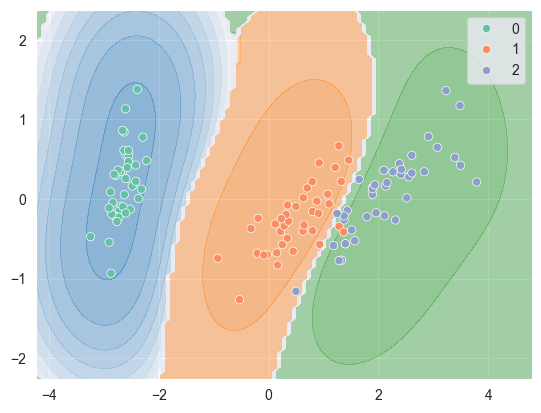

In [8]:
# 초평면 시각화
from sklearn.inspection import DecisionBoundaryDisplay

# from_estimator(모델, 경계를 그릴 범위)
# X_train_pca:  2차원 학습데이터 -> 어디까지 경계를 그릴지 기준이 되는 범위
DecisionBoundaryDisplay.from_estimator(svm_clf, X_train_pca, alpha=0.5)
                                                            # 배경 투명하게
# 학습데이터 시각화
sns.scatterplot(
    x=X_train_pca[:, 0],
    y=X_train_pca[:, 1],
    hue = y_train,
    palette = 'Set2'
)

plt.show()

## 실습 : California Housing Dataset
 1. 데이터로드
 2. SVR 여러 커널 테스트
 3. 평가지표 확인
- 커널별로 C(규제억수), epsilon, gamma 하이퍼파라미터 확인

In [16]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target

In [21]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(y_test.shape, y_test.shape)

print('X 스케일링 전 :', X_train[:1])
print('y 스케일링 전 :', y_train[:1])

X_scaler = StandardScaler()
X_train = X_scaler.fit+transform(X_train)

(16512, 8) (16512,)
(4128,) (4128,)
X 스케일링 전 : [[ 3.25960000e+00  3.30000000e+01  5.01765650e+00  1.00642055e+00
   2.30000000e+03  3.69181380e+00  3.27100000e+01 -1.17030000e+02]]
y 스케일링 전 : [1.03]


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.